## Heart Disease Prediction Model (Edureka project 3)

### Dennis Kinoti Gikunda


### Data (Kaggle link):

https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset


### Objective:
1. Develop the best performing model to predict the probability of a patient having heart disease or a heart attack.

2. Identify the most important drivers for heart disease or attack.

### Data Description:
The dataset includes various features related to patients' health and lifestyle, which will be used to predict the target variable: HeartDiseaseorAttack.

### Features:

HeartDiseaseorAttack: Target variable indicating prior heart disease or heart attack.

HighBP: High blood pressure (binary).

HighChol: High cholesterol levels (binary).

BMI: Body Mass Index (numeric).

Smoker: Smoker status (binary).

Diabetes: Diabetes status (binary).

Fruits: Daily fruit consumption (binary).

Veggies: Daily vegetable consumption (binary).

HvyAlcoholConsump: Heavy alcohol consumption (binary).

MentHlth: Mental health (numeric, 0-30).

PhysHlth: Physical health (numeric, 0-30).

Sex: Gender.

Age: Age binned into categories (1-13).

Education: Education level binned into categories (1-6).

Income: Income binned into categories (1-8).

### Steps and Tasks:
1. Import Libraries and Load Dataset

2. Exploratory Data Analysis (EDA): Univariate Analysis, Multivariate Analysis, Feature Engineering, Model Experimentation, ...

3. Use precision-recall curves to determine the best threshold.

4. Use techniques like oversampling (SMOTE), undersampling, or class-weight adjustments.

5. Create end-to-end training and inference pipelines.

## Import Libraries and Load Dataset

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

# Load dataset
data = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')

# Display first few rows of the dataset
data.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## Exploratory Data Analysis (EDA)

### a. Univariate Analysis

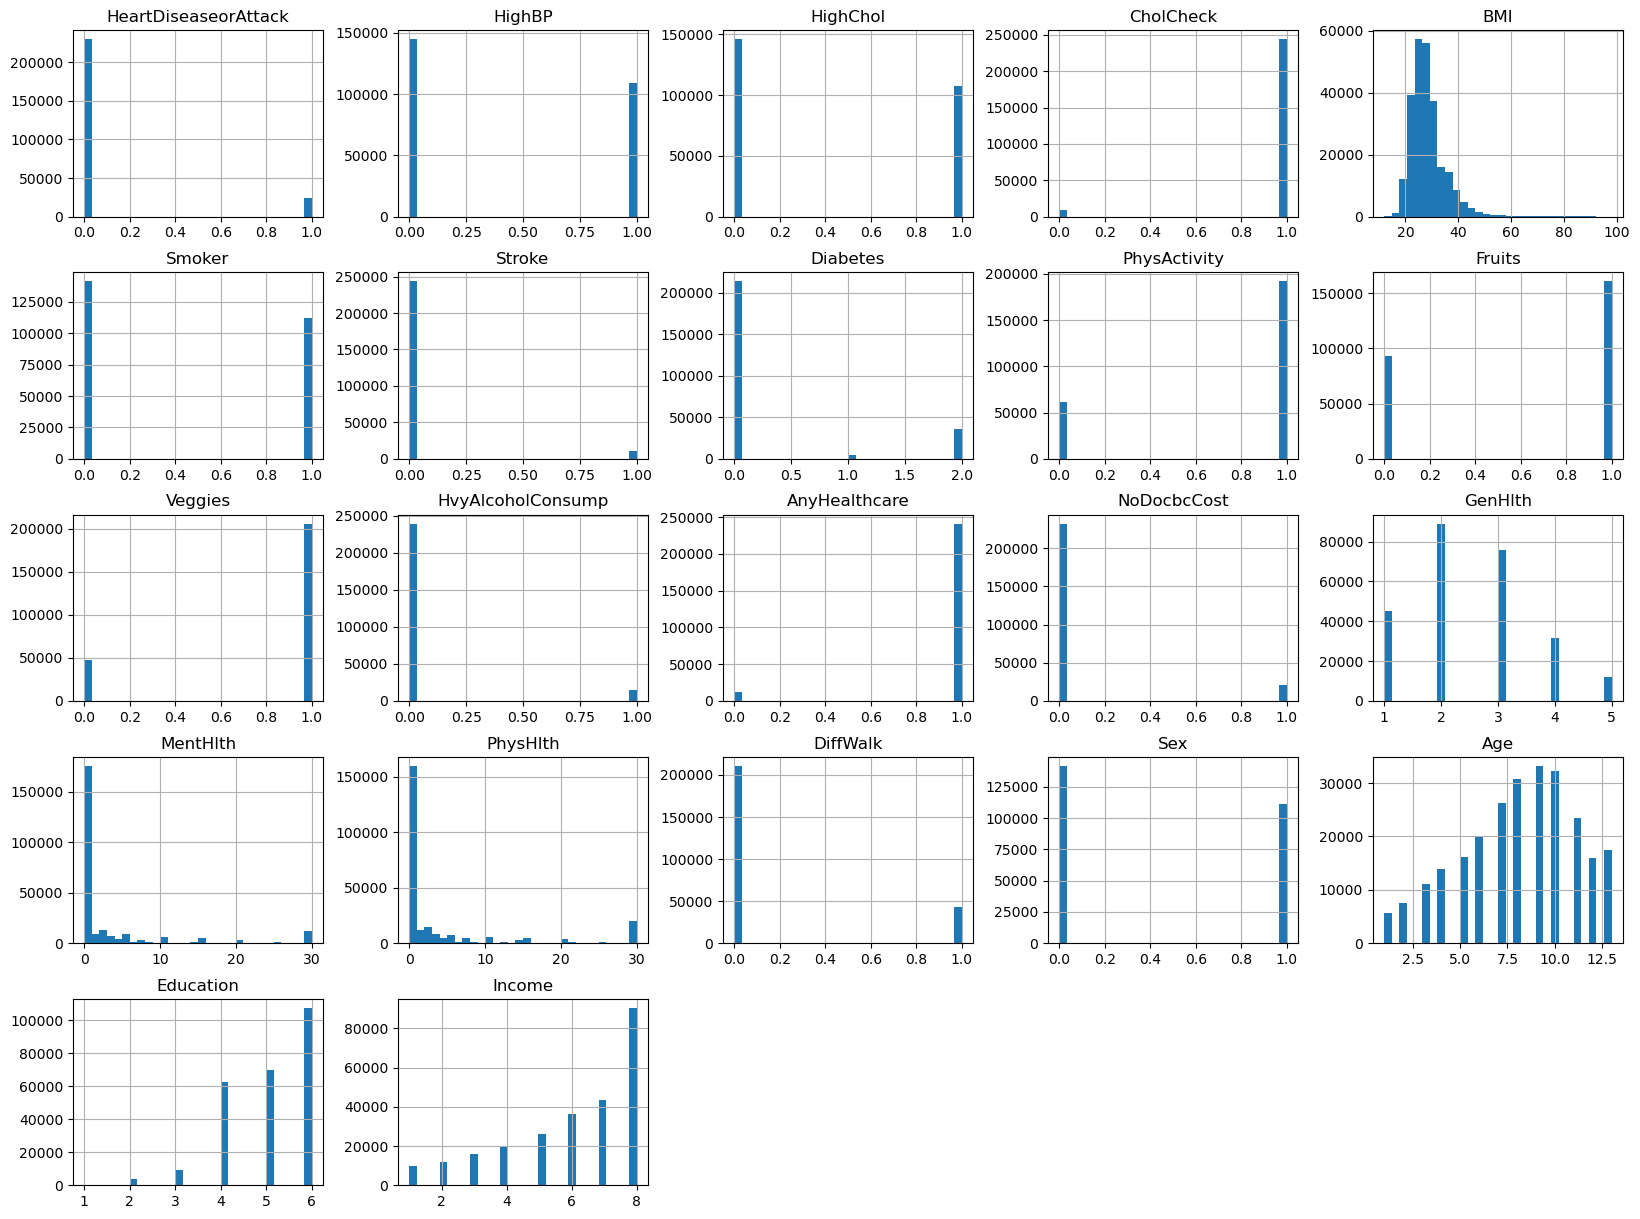

In [2]:
# Plotting histograms for numeric features
data.hist(bins=30, figsize=(20, 15))
plt.show()

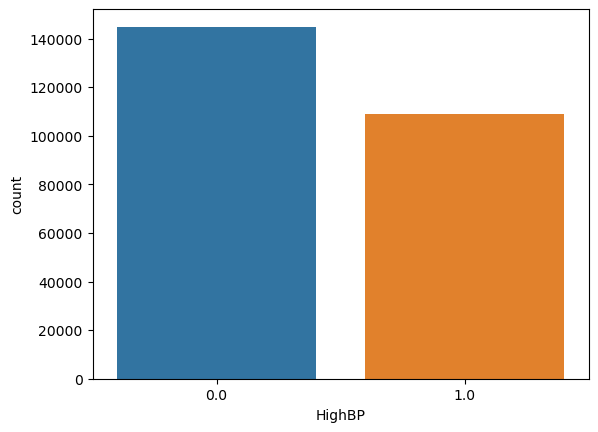

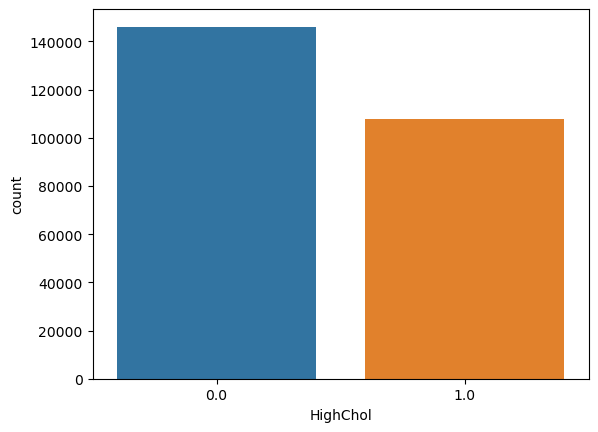

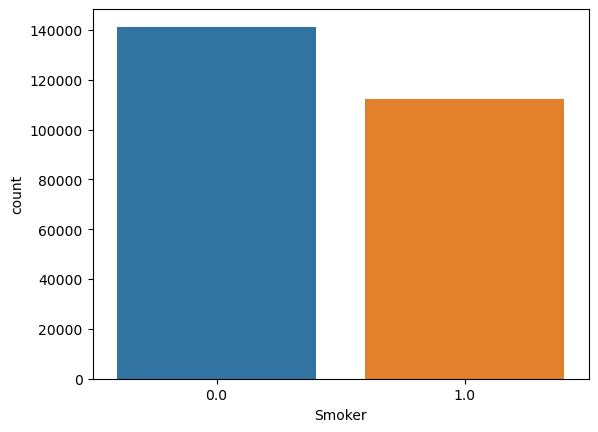

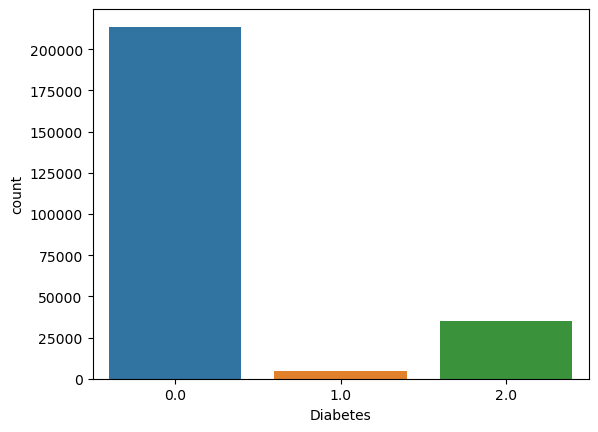

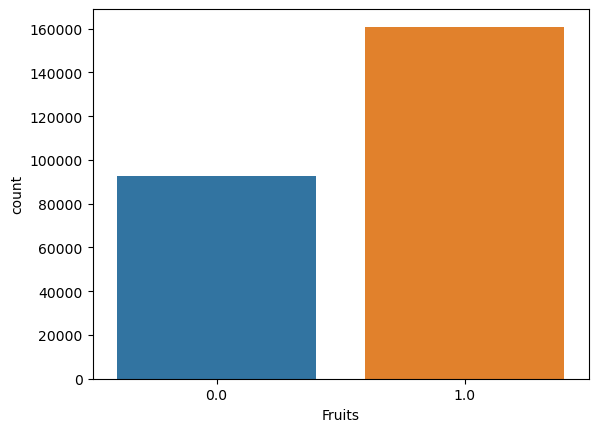

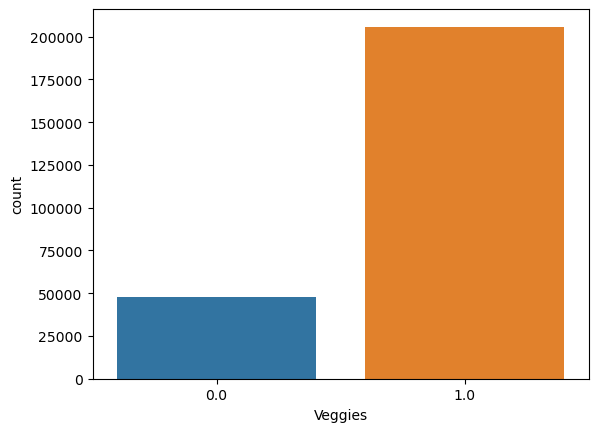

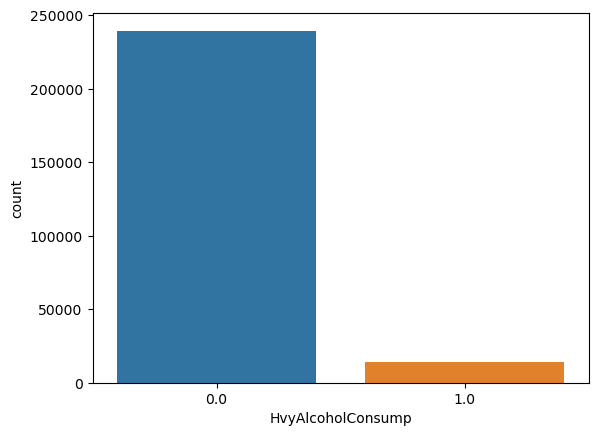

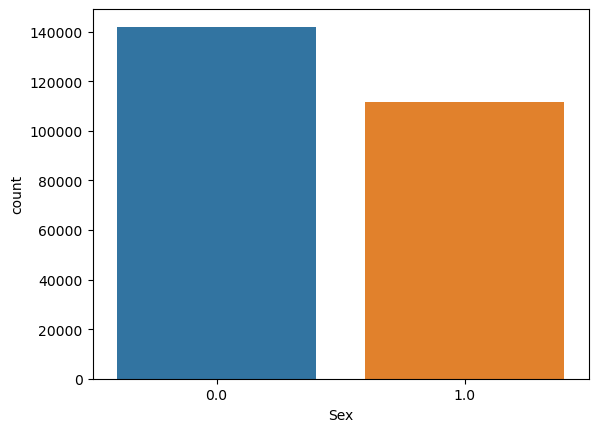

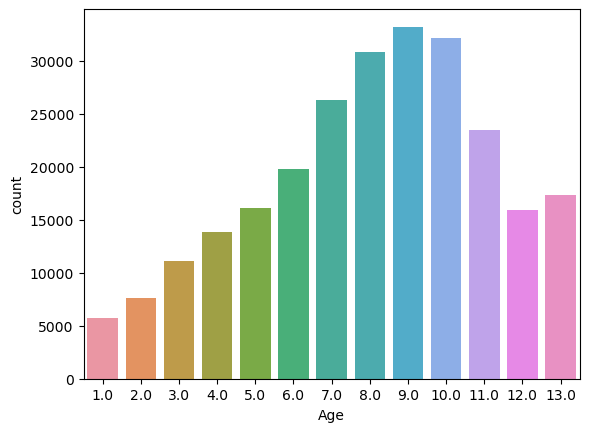

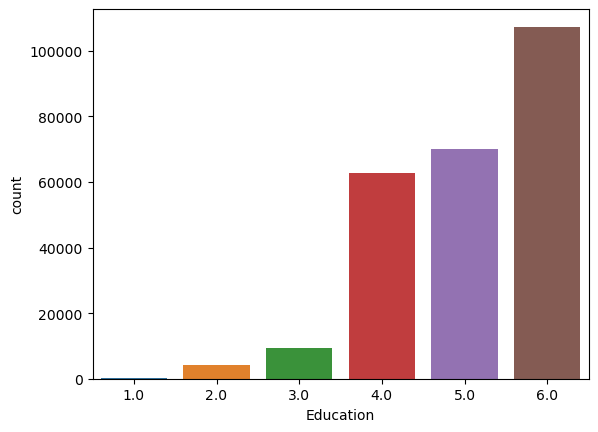

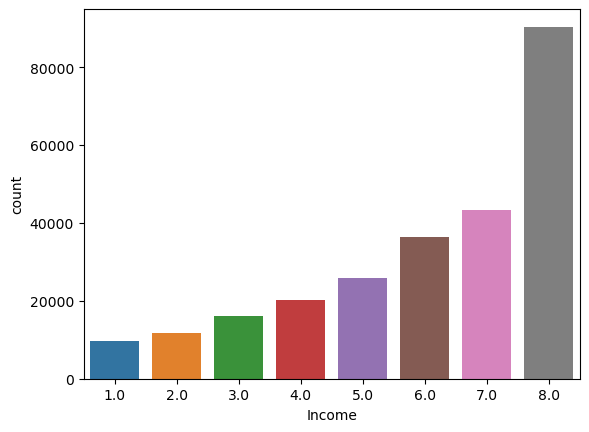

In [3]:
# Count plots for binary and categorical features
binary_features = ['HighBP', 'HighChol', 'Smoker', 'Diabetes', 'Fruits', 'Veggies', 'HvyAlcoholConsump']
categorical_features = ['Sex', 'Age', 'Education', 'Income']

for feature in binary_features + categorical_features:
    sns.countplot(data=data, x=feature)
    plt.show()

### b. Multivariate Analysis

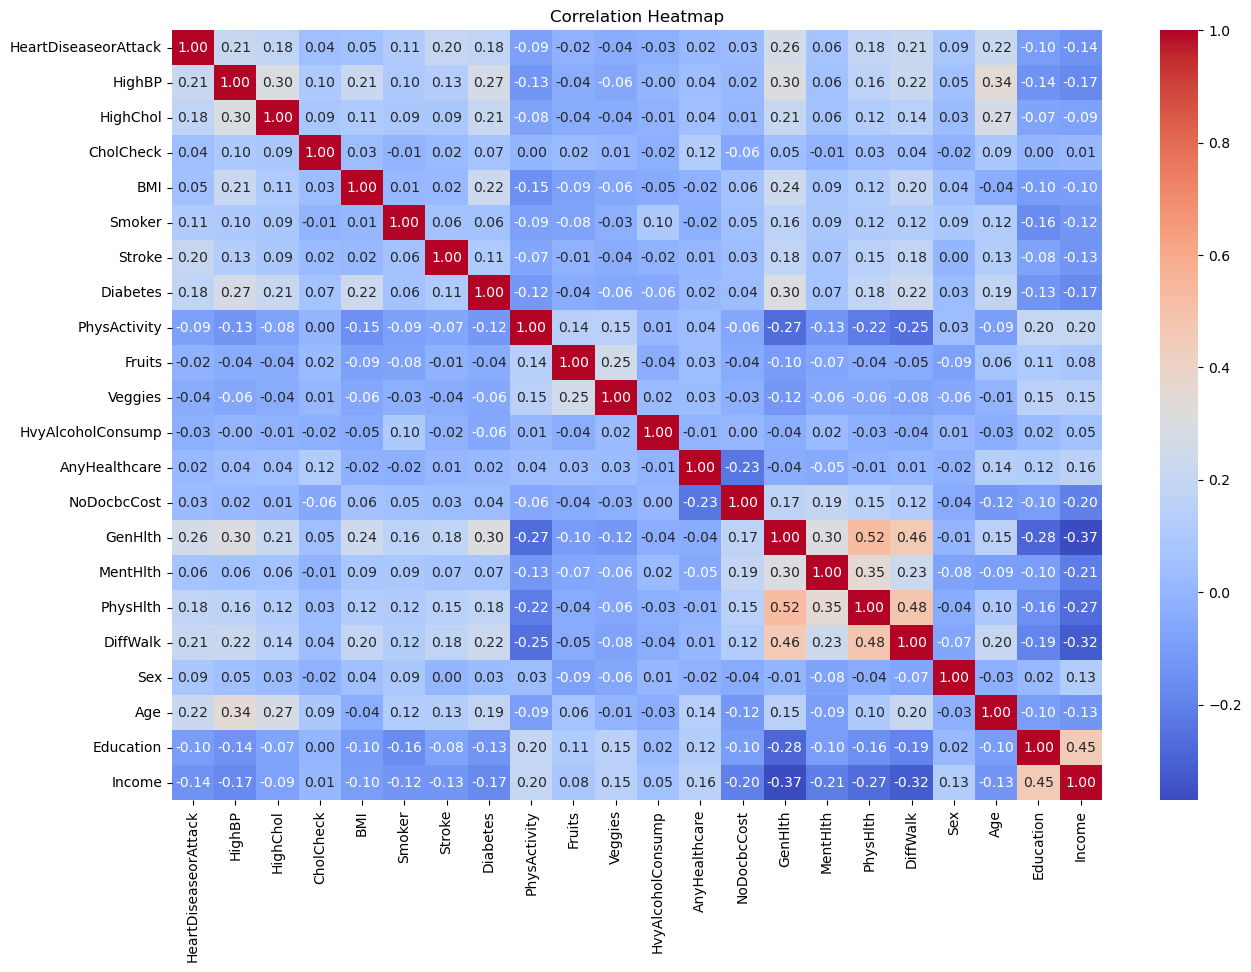

In [4]:
# Correlation heatmap
plt.figure(figsize=(15, 10))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### c. Feature Engineering

In [5]:
# Create Interaction Terms
data['BMI_Age'] = data['BMI'] * data['Age']

In [6]:
# Bin Continuous Variables
data['BMI_Bin'] = pd.cut(data['BMI'], bins=5, labels=False)

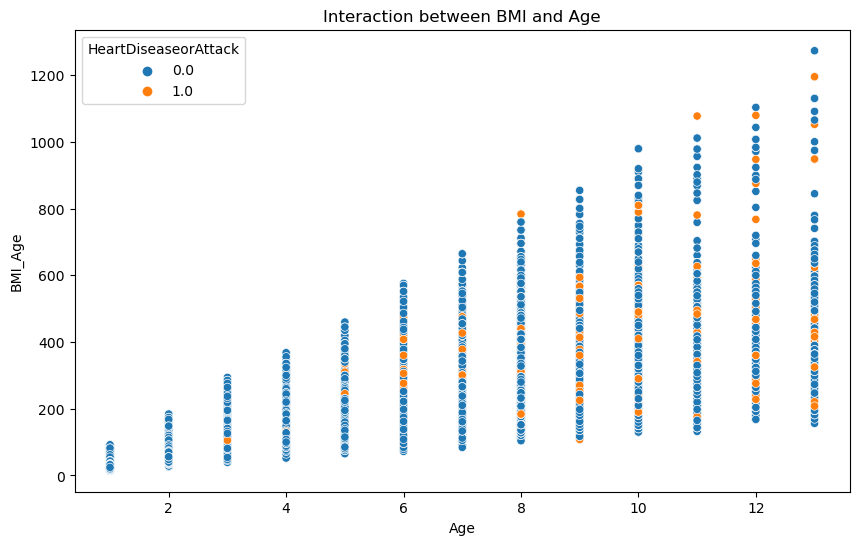

In [7]:
# Analyze the Interaction Term
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='BMI_Age', hue='HeartDiseaseorAttack', data=data)
plt.title('Interaction between BMI and Age')
plt.show()

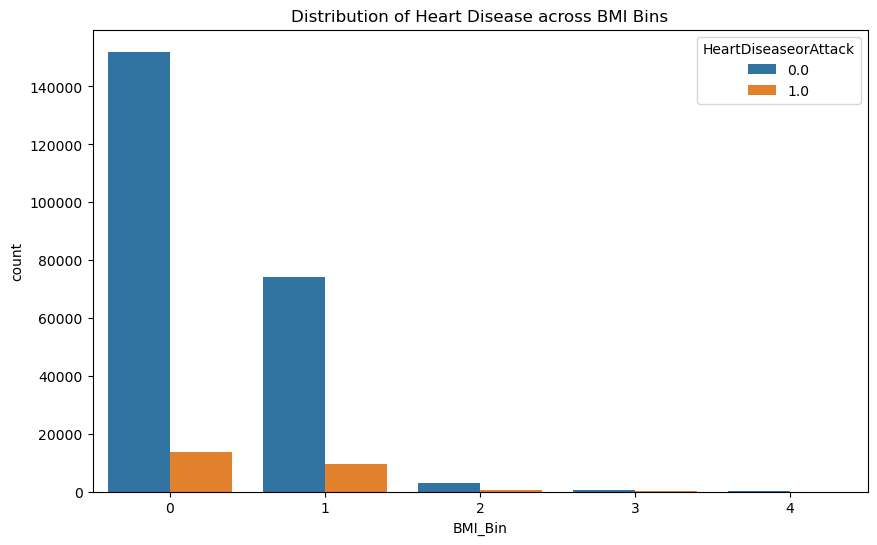

In [8]:
# Analyze the Binned Variable
plt.figure(figsize=(10, 6))
sns.countplot(x='BMI_Bin', hue='HeartDiseaseorAttack', data=data)
plt.title('Distribution of Heart Disease across BMI Bins')
plt.show()

### Splitting Data into Training and Testing Sets

In [9]:
# Splitting data into training and testing sets
X = data.drop('HeartDiseaseorAttack', axis=1)
y = data['HeartDiseaseorAttack']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Display the shape of the splits to confirm
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (152208, 23)
X_test shape: (101472, 23)
y_train shape: (152208,)
y_test shape: (101472,)


### Apply SMOTE to the Training Data to Handle Class Imbalance

In [10]:
# Handling class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

### Model Training and Evaluation (on Resampled Data)

In [11]:
# Defining models to experiment with
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier()
}

# Support Vector Machine was taking long to terminate, so I left out the model.

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

# Fit models and evaluate
results = {}
for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    
    pipeline.fit(X_train_res, y_train_res)
    y_pred = pipeline.predict(X_test)
    y_scores = pipeline.predict_proba(X_test)[:, 1] if hasattr(pipeline.named_steps['classifier'], 'predict_proba') else None
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_scores) if y_scores is not None else None
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC Score': roc_auc,
        'Confusion Matrix': conf_matrix,
        'Classification Report': class_report
    }
    
    print(f'\nModel: {name}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    if roc_auc is not None:
        print(f'ROC AUC Score: {roc_auc:.4f}')
    print('Confusion Matrix:')
    print(conf_matrix)
    print('Classification Report:')
    print(class_report)


Model: Logistic Regression
Accuracy: 0.7551
Precision: 0.2478
Recall: 0.7863
F1 Score: 0.3768
ROC AUC Score: 0.8459
Confusion Matrix:
[[69103 22812]
 [ 2042  7515]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.75      0.85     91915
         1.0       0.25      0.79      0.38      9557

    accuracy                           0.76    101472
   macro avg       0.61      0.77      0.61    101472
weighted avg       0.90      0.76      0.80    101472


Model: Random Forest
Accuracy: 0.9018
Precision: 0.4279
Recall: 0.1258
F1 Score: 0.1944
ROC AUC Score: 0.8189
Confusion Matrix:
[[90308  1607]
 [ 8355  1202]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95     91915
         1.0       0.43      0.13      0.19      9557

    accuracy                           0.90    101472
   macro avg       0.67      0.55      0.57    101472
weighted avg       0.87      

In [13]:
# Choose the best model based on evaluation metrics
best_model = max(results, key=lambda k: results[k]['ROC AUC Score'] if results[k]['ROC AUC Score'] is not None else 0)
print(f'\nBest Model: {best_model}')


Best Model: Logistic Regression


## Model Development and Deployment Pipeline

### 1. Hyperparameter Tuning

In [14]:
# from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__solver': ['liblinear', 'saga']
}

# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_res, y_train_res)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best parameters: {best_params}")

Best parameters: {'classifier__C': 100, 'classifier__solver': 'saga'}


### 2. Model Evaluation

In [15]:
# Predict on the test set
y_pred = best_model.predict(X_test)
y_scores = best_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_scores)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.7550
Precision: 0.2478
Recall: 0.7863
F1 Score: 0.3768
ROC AUC Score: 0.8459
Confusion Matrix:
[[69101 22814]
 [ 2042  7515]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.75      0.85     91915
         1.0       0.25      0.79      0.38      9557

    accuracy                           0.76    101472
   macro avg       0.61      0.77      0.61    101472
weighted avg       0.90      0.76      0.80    101472



Accuracy: The model correctly predicts outcomes around 75.5% of the time.

Precision: When predicting a person has a heart disease or attack, it is correct about 24.78% of the time.

Recall: It identifies approximately 78.63% of all actual instances of heart disease or attack.

F1 Score: Balances the precision and recall, showing moderate performance on the imbalanced dataset.

ROC AUC Score: Demonstrates good discrimination ability between positive and negative instances, with a score of 84.59%.

### 3. Model Interpretation

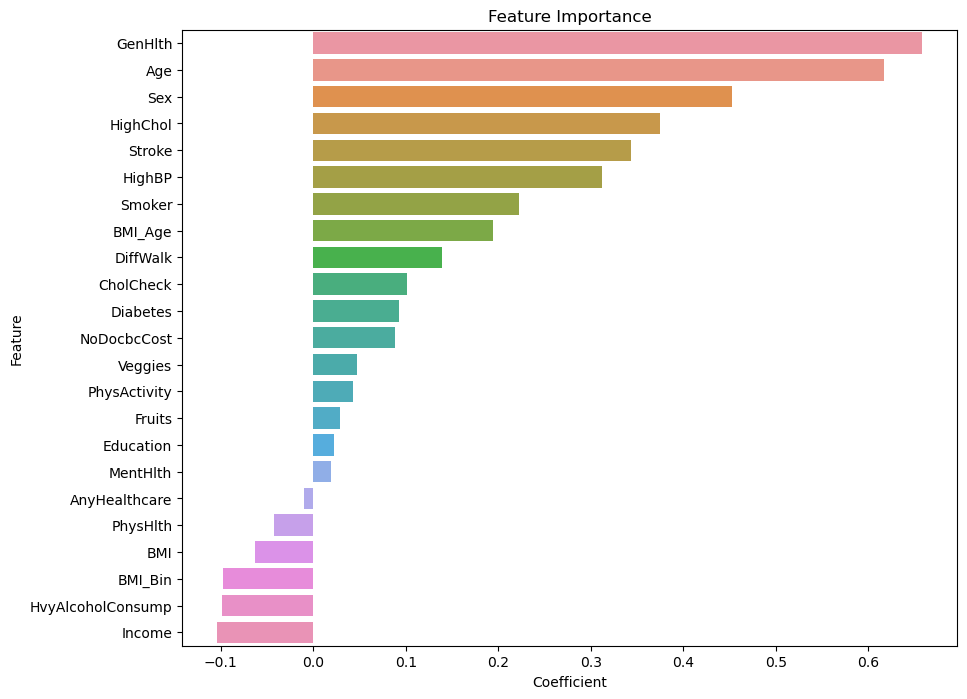

In [16]:
# Feature Importance
coefficients = best_model.named_steps['classifier'].coef_[0]
features = X_train.columns
importance = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

plt.figure(figsize=(10, 8))
importance.sort_values(by='Coefficient', ascending=False, inplace=True)
sns.barplot(x='Coefficient', y='Feature', data=importance)
plt.title('Feature Importance')
plt.show()

The Analyis of the feature importances (coefficients) of the Logistic Regression model above shows which features are the most significant drivers of heart disease or attack.

### 4. Model Deployment

In [17]:
import joblib

# Save the pipeline
joblib.dump(best_model, 'logistic_regression_pipeline.pkl')

['logistic_regression_pipeline.pkl']